<a href="https://colab.research.google.com/github/jasa226075/janak/blob/master/Exploratory_Data_Analysis__NYT_Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of NYT Article 

Authors: Janak Sarvaiya, Radhika Rangu, Preet Mehta


## Table of Contents

1. Analyzing text statistics
Text statistics visualizations are simple but very insightful techniques. 

  - Word frequency analysis
  - Sentence length analysis
  - Average word length analysis
2. Top_ngrams_barchart
3. Topic modeling exploration with pyLDAvis
4. Wordcloud

# Table of Contents
1. Understanding the Problem Statement
2. Basic Text Data Pre-processing
3. Cleaning Text Data
4. Preparing Data for Exploratory Data Analysis (EDA)
5. Exploratory Data Analysis of Text Data (Amazon’s Products)

# Understanding the Problem Statement
  - The first step in any machine learning project is understanding the problem. So that’s what we’ll aim to do here.


<h4 align="center">The New York Times (Source: Getty images)</h4> 
<style>
img {
  display: block;
  margin-left: auto;
  margin-right: auto;
}
</style>
<img src = "https://media.gettyimages.com/photos/copies-of-the-new-york-times-sit-for-sale-in-a-rack-july-23-2008-in-picture-id82046046?s=2048x2048", width="800px",style="vertical-align:middle">


The dataset has about 76,000+ rows, each containing 'writer name', 'publishing date','snippet', 'word counts',  'document_type', and 'main_headline' for each article. Our objective is to use this data, explore it, and generate insights from it.


In [ ]:
df.head()

NameError: ignored

Let’s get the ball rolling and explore this dataset using different techniques and generate insights from it.

# Basic Text Data Pre-processing
Before jumping to the exploration stage, we need to perform basic data pre-processing steps like null value imputation and removal of unwanted data. So, let’s start by importing libraries and reading our dataset:

In [ ]:
#Step 1: importing libraries
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

In [ ]:
#Importing the data set

df=pd.read_csv('NYT_articles_1981_2018.csv')

print("Shape of data=>",df.shape)

Shape of data=> (76048, 13)


In [ ]:
#Let's hava a look at the columns
df.columns

Index(['Link', 'writer_name', 'pub_date', 'snippet', 'word_count', 'score',
       'source', 'section_name', 'type_of_material', 'document_type',
       'main_headline', 'Unnamed: 11', 'print_headline'],
      dtype='object')

In [ ]:
df.isnull().sum()

Link                    0
writer_name         20622
pub_date                0
snippet             36920
word_count              0
score               76048
source                  0
section_name            0
type_of_material     1110
document_type           0
main_headline           4
Unnamed: 11             0
print_headline       2319
dtype: int64

In [ ]:
#Deleting score columns as it's entierly blank
df=df.drop(columns=['score'])

In [ ]:
#Deleting #4 rows of main_headline columns which are entierly blank
df = df.dropna(axis=0, subset=['main_headline'])

In [ ]:
df.isnull().sum()

Link                    0
writer_name         20619
pub_date                0
snippet             36918
word_count              0
source                  0
section_name            0
type_of_material     1110
document_type           0
main_headline           0
Unnamed: 11             0
print_headline       2316
dtype: int64

In [ ]:
# Lets take only date and headline
df1=df[['pub_date','main_headline']]

In [ ]:
df1.shape
# It's visible that 4 rows are removed

(76044, 2)

That’s it! We are finished with the basic data-preprocessing part. Let’s move to the next section – cleaning text data.

# Cleaning Text Data in Python
  - Generally, text data contains a lot of noise either in the form of symbols or in the form of punctuations and stopwords. Therefore, it becomes necessary to clean the text, not just for making it more understandable but also for getting better insights.

  - In this section, we’ll perform text cleaning on the columns containing textual data. If you want to learn in-depth about text cleaning in Python, you can read this fantastic article: Steps for effective text data cleaning (with a case study using Python). It explains various techniques of text cleaning with implementation in python.

<!-- - Here, we have four columns in our dataset out of which two columns (‘name’, ‘reviews.text’) contain textual data. So, let’s start with the ‘name’ column first and take a look at the text present in this column: -->

In [ ]:
df.nunique()

Link                76044
writer_name          3512
pub_date            12656
snippet             38822
word_count           3414
source                  3
section_name            5
type_of_material       40
document_type           2
main_headline       72008
Unnamed: 11           186
print_headline      69835
dtype: int64

In [ ]:
df['main_headline']

0                                           Uranium Accord
1                                        EXECUTIVE CHANGES
2        Business People; NEW CHIEF EXPECTED AT ABRAHAM...
3                              Talking Scanner to Be Tried
4               INTEREST RATES SURGE OVER DOUBTS ON BUDGET
                               ...                        
76043    Google Strikes Humble Tone While Promoting A.I...
76044    Corruption Arrests in Argentina Raise Hope, an...
76045    Asia Argento Scandal Makes for Open Season on ...
76046    Argentine Police Officer Promoted After Breast...
76047    An Embassy, 850 Pounds of Cocaine and Now 6 Ar...
Name: main_headline, Length: 76044, dtype: object

This column contains article headlines from different writers, which are longer in length, and our complete analysis will be based on this data. Therefore, it becomes necessary to clean this thoroughly. The best way of determining data cleaning steps is by taking a look at some headlines from the dataset:

In [ ]:
for index,text in enumerate(df1['main_headline'][100:130]):
  print('Headline %d:\n'%(index+1),text)

Headline 1:
 Ship Fire Imperils Egyptian Port
Headline 2:
 Argentine Cargo Plane Said to Crash in Soviet
Headline 3:
 Cemetery Concern Has New President
Headline 4:
 A CO-OP IS CREATED ON CITY ISLAND WITH REBUILT COTTAGES
Headline 5:
 GATEWAY INDUSTRIES reports earnings for Qtr to Sept 30
Headline 6:
 PATENTS;
Oral Composition Devised To Treat Hemorrhoids
Headline 7:
 A STAKE IN CANADIAN PACIFIC
Headline 8:
 Storms Compel Indonesians To Halt Hunt for Survivors
Headline 9:
 PIC 'N' SAVE INC reports earnings for Qtr to Sept 30
Headline 10:
 GALBRAITH
Headline 11:
 Business Digest; FRIDAY, APRIL 3, 1981; The Economy
Headline 12:
 BLACK 'HOMELAND': SHANTIES ON THE VELD
Headline 13:
 WEDNESDAY, JUNE 3, 1981; The Economy
Headline 14:
 Executives
Headline 15:
 DICOMED CORP reports earnings for Qtr to Sept 30
Headline 16:
 MISS WEINSTEIN TO HEAD M-G-M UNIT
Headline 17:
 Two Wounded by Ulster Snipers
Headline 18:
 OPEC SEEKS TO HEAL RIFT
Headline 19:
 Doctors' Strike Spreads To Miners in Peru
H

Here, you can see that we have some contractions like “has”,"to" numbers like “30” and punctuations like “,”, “!” and “.” present in the reviews. We’ll handle these by performing the below operations:

  - Expand contractions
  - Lowercase the reviews
  - Remove digits and words containing digit
  - Remove punctuations
So, let’s start by expanding contractions.


  - Expand Contractions
    - Contractions are the shortened versions of words like don’t for do not and how’ll for how will. These are used to reduce the speaking and writing time of words. We need to expand these contractions for a better analysis of the reviews.

    - Here, I have created a dictionary of common English contractions that I will use for mapping the contractions to their expanded forms:

In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df1['main_headline']=df1['main_headline'].apply(lambda x:expand_contractions(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Here, the expand_contractions function uses regular expressions to map the contractions in the text to their expanded forms from the dictionary. I will be using regular expressions a lot in the upcoming sections. Now that we have expanded the contractions, it’s time to lowercase the words.
# Lowercase the reviews
In NLP, models treat words like Goat and goat differently, even if they are the same. Therefore, to overcome this problem, we lowercase the words. Here, I am using the lower() function available in Python for converting text to lowercase:

In [ ]:
df1['cleaned']=df1['main_headline'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Remove digits and words containing digits
Next, we need to remove numbers and words containing digits from the reviews. I am doing this because digits and words containing digits do not give much importance to the main words. To do this, I am using regular expressions with lambda functions.

In [ ]:
df1['cleaned']=df1['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Remove Punctuations
Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but not for text analysis. Therefore, they need to be removed:

In [ ]:
df1['cleaned']=df1['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Here, string.punctuations function contains all the punctuations and we use regular expressions to search them in the text and remove them. Finally, we still have some extra spaces present in the data. Let’s remove them:

In [ ]:
# Removing extra spaces
df1['cleaned']=df1['cleaned'].apply(lambda x: re.sub(' +',' ',x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for index,text in enumerate(df1['cleaned'][100:130]):
  print('Headline %d:\n'%(index+1),text)

Headline 1:
 ship fire imperils egyptian port
Headline 2:
 argentine cargo plane said to crash in soviet
Headline 3:
 cemetery concern has new president
Headline 4:
 a coop is created on city island with rebuilt cottages
Headline 5:
 gateway industries reports earnings for qtr to sept 
Headline 6:
 patents
oral composition devised to treat hemorrhoids
Headline 7:
 a stake in canadian pacific
Headline 8:
 storms compel indonesians to halt hunt for survivors
Headline 9:
 pic n save inc reports earnings for qtr to sept 
Headline 10:
 galbraith
Headline 11:
 business digest friday april the economy
Headline 12:
 black homeland shanties on the veld
Headline 13:
 wednesday june the economy
Headline 14:
 executives
Headline 15:
 dicomed corp reports earnings for qtr to sept 
Headline 16:
 miss weinstein to head mgm unit
Headline 17:
 two wounded by ulster snipers
Headline 18:
 opec seeks to heal rift
Headline 19:
 doctors strike spreads to miners in peru
Headline 20:
 east midtowns office ten

# Great! We have cleaned the text data and are just one section away from the EDA stage!

# Preparing Text Data for Exploratory Data Analysis (EDA)
We have already cleaned our data and have our corpus ready, but there are still some steps left to be done before EDA. In this section, we’ll create a Document Term Matrix that we’ll later use in our analysis.

Now, you might be wondering what is a Document Term Matrix and why do we have to create one?

A Document Term Matrix provides the frequency of a word in a corpus (collection of documents), which in this case are reviews. It helps in analyzing the occurrence of words in different documents in a corpus. The following figure is an example of a document term matrix:

<img src ="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/et22-e1586856677843.png">

In this section, we’ll do the following things:

1 Stopwords Removal
2 Lemmatization
3 Create Document Term Matrix
  - Stopwords are the most common words of a language like ‘I’, ‘this’, ‘is’, ‘in’ which do not add much value to the meaning of a document. These values are removed to decrease the dataset size and increase focus on meaningful words.

  - Lemmatization is a systematic process of reducing a token to its lemma. It uses vocabulary, word structure, part of speech tags, and grammar relations to convert a word to its base form. You can read more about stopwords removal and lemmatization in this article: NLP Essentials: Removing Stopwords and Performing Text Normalization using NLTK and spaCy in Python.

We’ll use SpaCy for the removal of stopwords and lemmatization. It is a library for advanced Natural Language Processing in Python and Cython.

In [ ]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

In [ ]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

     |████████████████████████████████| 12.0 MB 7.5 MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-py3-none-any.whl size=12019121 sha256=696dcf590ebecb4cd926f965cf2dad4fc25347a7364219b0a719d1a1d1b62911
  Stored in directory: /root/.cache/pip/wheels/64/69/41/6f820cf1d7488a0381a2059f66ec9f8f23116f7c67d18f3d8d
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5


In [ ]:
pip uninstall tensorflow tensorflow-tensorboard tensorflow-estimator

Found existing installation: tensorflow 2.4.1
Uninstalling tensorflow-2.4.1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
y
y
y
y
y
y
  Successfully uninstalled tensorflow-2.4.1
Found existing installation: tensorflow-estimator 2.4.0
Uninstalling tensorflow-estimator-2.4.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/tensorflow_estimator-2.4.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow_estimator/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-estimator-2.4.0


In [ ]:
pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 50 kB 8.2 MB/s 
     |████████████████████████████████| 503 kB 40.8 MB/s 
     |████████████████████████████████| 3.8 MB 29.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7538 sha256=fb3a55b200d48bf002791a44cc6944ce4691bbf2667db1d96a661da794d8363a
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ten

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.7 MB 107 kB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# Importing spacy
import spacy

# Loading model
#nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df1['lemmatized']=df1['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1

pub_date  ...                                         lemmatized
0      22-09-81  ...                                     uranium accord
1      08-10-81  ...                                   executive change
2      16-07-81  ...    business people new chief expect abraham straus
3      10-11-81  ...                                   talk scanner try
4      26-09-81  ...                   interest rate surge doubt budget
...         ...  ...                                                ...
76043  08-05-18  ...    google strike humble tone promote ai technology
76044  08-01-18  ...  corruption arrest argentina raise hope skepticism
76045  21-08-18  ...  asia argento scandal make open season metoo italy
76046  23-08-18  ...  argentine police officer promote breastfeed ne...
76047  23-02-18  ...                       embassy pound cocaine arrest

[76044 rows x 4 columns]

We have removed stopwords and lemmatized our reviews successfully. Let’s group them according to the products

In [ ]:
df2=df1

In [ ]:
df_grouped=df2[['pub_date','lemmatized']].groupby(by='pub_date').agg(lambda x:' '.join(x))
df_grouped

lemmatized
pub_date                                                   
01-01-00  absence midnight nt darken spirit ugly ducklin...
01-01-01  wallflower popular diploma hand japanese woman...
01-01-02  send ground troop assist search omar hyundai s...
01-01-03  say pakistani guard shoot soldier afghanistan ...
01-01-04  unemployment claim reach low level year auld l...
...                                                     ...
31-12-95  judge urge world heed rwanda crisis capital re...
31-12-96  auto incentive see italian government company ...
31-12-97  investor urge inland spinoff danilo dolci vivi...
31-12-98  brace south park come pc makeover cd fresh fac...
31-12-99  broadcom founder sell share negotiation hijack...

[12656 rows x 1 columns]

# It’s time to create a Document Term Matrix

In [ ]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm
print(df_dtm.shape)

(12656, 26642)


Finally, we have completed all the procedures required before starting our analysis, and we have our dataset present in the exact format needed for the exploration stage.

#Exploratory Data Analysis on Amazon Product Reviews using Python
Yes – it’s finally time for Exploratory Data Analysis! It is a crucial part of any data science project because that’s where you get to know more about the data. In this phase, you can reveal hidden patterns in the data and generate insights from it.

So, let’s start by looking at the common words present in the reviews for each article. For this, I will use the document term matrix created earlier with word clouds for plotting these words. Word clouds are the visual representations of the frequency of different words present in a document. It gives importance to the more frequent words which are bigger in size compared to other less frequent words.

Word clouds can be generated using the wordcloud library. So, let’s plot word clouds for each year:

In [ ]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm['pub_date'].sort_values(ascending=False),pub_date)

KeyError: ignored

In [ ]:
df_dtm[pub_date]

NameError: ignored

In [ ]:
# 4.0: Wordcloud
# Wordcloud is a great way to represent text data. 
#The size and color of each word that appears in the wordcloud indicate it’s frequency or importance.

# Creating wordcloud in python with is easy but we need the data in a form of a corpus.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


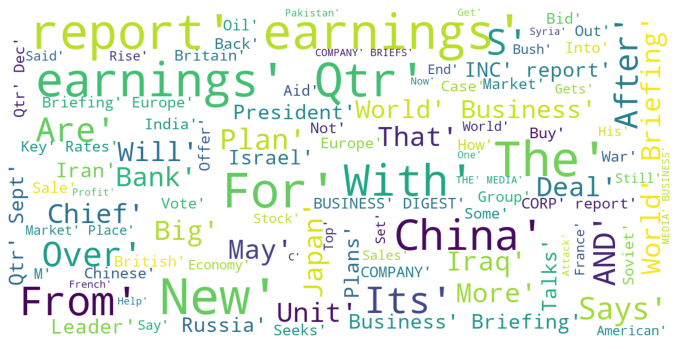

In [ ]:
plot_wordcloud(df['main_headline'])

In [ ]:
df1['main_headline']

0                                           Uranium Accord
1                                        EXECUTIVE CHANGES
2        Business People; NEW CHIEF EXPECTED AT ABRAHAM...
3                              Talking Scanner to Be Tried
4               INTEREST RATES SURGE OVER DOUBTS ON BUDGET
                               ...                        
76043    Google Strikes Humble Tone While Promoting A.I...
76044    Corruption Arrests in Argentina Raise Hope, an...
76045    Asia Argento Scandal Makes for Open Season on ...
76046    Argentine Police Officer Promoted After Breast...
76047    An Embassy, 850 Pounds of Cocaine and Now 6 Ar...
Name: main_headline, Length: 76044, dtype: object

# Importing the essential libraries

In [ ]:
pip install \
   pandas matplotlib numpy \
   nltk seaborn sklearn gensim pyldavis \
   wordcloud textblob spacy textstat

     |████████████████████████████████| 1.7MB 8.9MB/s 
     |████████████████████████████████| 102kB 12.7MB/s 
     |████████████████████████████████| 1.9MB 29.7MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=6aa503e1f51cf2f957c007486043863699239cb833bacf18c4af8c60e3592817
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyldavis


# Importing the data set

In [ ]:
# 1.0 Analyzing text statistics
# Text statistics visualizations are simple but very insightful techniques. 

# They include:

# word frequency analysis,
# sentence length analysis,
# average word length analysis,
# etc.

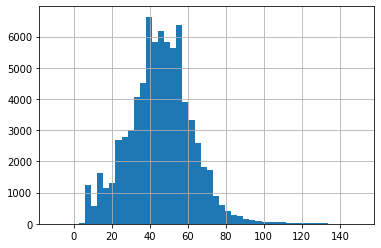

In [ ]:
#Let's take a look at the number of characters present in each sentence.
df1['main_headline'].str.len().hist(bins=50, range=[-10,150])

In [ ]:
df1['main_headline'].str.len().describe()

count    76044.000000
mean        45.699069
std         17.742893
min          2.000000
25%         35.000000
50%         46.000000
75%         56.000000
max        498.000000
Name: main_headline, dtype: float64

In [ ]:
# It shows that The histogram shows that news headlines range from 2 to 498 characters 
# and generally, it is between 35 to 56 characters.

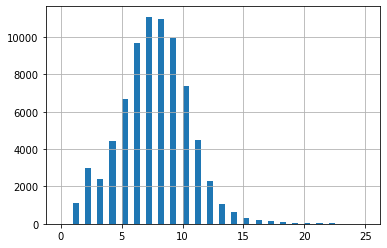

In [ ]:
df1['main_headline'].str.split().\
    map(lambda x: len(x)).\
    hist(bins=50,range=[0,25])

In [ ]:
df1['main_headline'].str.split().\
    map(lambda x: len(x)).describe()

count    76044.000000
mean         7.474225
std          3.002737
min          1.000000
25%          6.000000
50%          7.000000
75%          9.000000
max         86.000000
Name: main_headline, dtype: float64

In [ ]:
# It is clear that the number of words in news headlines ranges from 1 to 86 and mostly falls between 6 to 9 words.

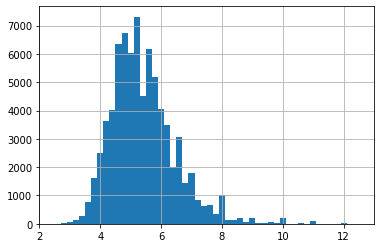

In [ ]:
# Let’s check the average word length in each sentence.
df['main_headline'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(bins=50,range=[2.5,12.5])

In [ ]:
df['main_headline'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).describe()

count    76044.000000
mean         5.417411
std          1.083100
min          1.000000
25%          4.666667
50%          5.250000
75%          6.000000
max         21.000000
Name: main_headline, dtype: float64

In [ ]:
# The average word length ranges between 1 to 21 with 5 being the most common length.
# Does it mean that people are using really short words in news headlines? Let’s find out.

In [ ]:
# One reason why this may not be true is stopwords. 
# Stopwords are the words that are most commonly used in any language such as “the”,” a”,” an” etc.
# As these words are probably small in length these words may have caused the above graph to be left-skewed.
# Analyzing the amount and the types of stopwords can give us some good insights into the data.
# To get the corpus containing stopwords you can use the nltk library. Nltk contains stopwords from many languages.
# Since we are only dealing with English news I will filter the English stopwords from the corpus.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 10 artists>

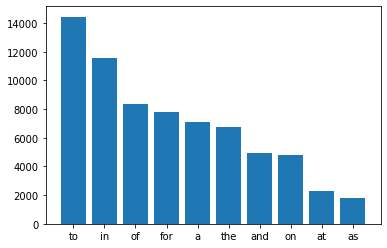

In [ ]:
corpus=[]
new= df['main_headline'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

In [ ]:
# We can evidently see that stopwords such as “to”,” in” and “for” dominate in news headlines.
# So now we know which stopwords occur frequently in our text, 
# Let’s inspect which words other than these stopwords occur frequently.

In [ ]:
import collections
import seaborn as sns

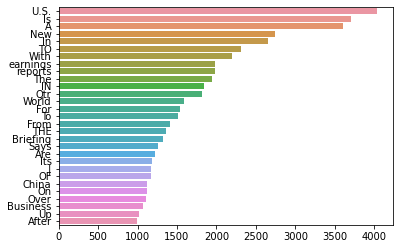

In [ ]:

counter=collections.Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [ ]:
# Wow! The “U.S.”, “Is” and “A” dominate the headlines over the last 15 years.

In [ ]:
#2.0 Ngram exploration

In [ ]:
# Ngrams are simply contiguous sequences of n words. For example “riverbank”,” The three musketeers” etc.
# If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on.

# Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.

# To implement n-grams we will use ngrams function from nltk.util. For example:

In [ ]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [ ]:
# Now that we know how to create n-grams lets visualize them.

# To build a representation of our vocabulary we will use Countvectorizer. 
# Countvectorizer is a simple method used to tokenize, vectorize and represent the corpus in an appropriate form. 
# It is available in sklearn.feature_engineering.text

# So with all this, we will analyze the top bigrams in our news headlines.

In [ ]:
#2.0-top_ngrams_barchart

In [ ]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

In [ ]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= df['main_headline'].str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

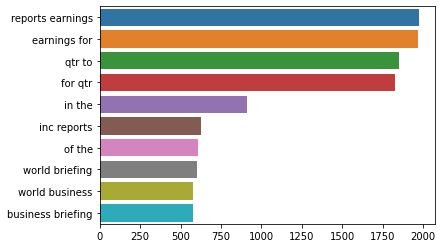

In [ ]:
plot_top_ngrams_barchart(df['main_headline'],2)

In [ ]:
# We can observe that the bigrams such as ‘reports earnings’, ’earning for’ that are related to war dominate the news headlines.

# How about trigrams?

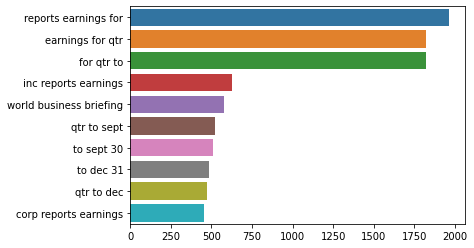

In [ ]:
plot_top_ngrams_barchart(df['main_headline'],3)

In [ ]:
# We can see that many of these trigrams are some combinations of “reports earnings for” and “earnings for qtr”. 
# It means that we should put some effort into data cleaning 
# and see if we were able to combine those synonym terms into one clean token.

In [ ]:
# 3.0 Topic modeling exploration with pyLDAvis

In [ ]:
# Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur 
# in a collection of documents.

# Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. 
# Each document is represented by the distribution of topics and each topic is represented by the distribution of words.

# Once we categorize our documents in topics we can dig into further data exploration for each topic or topic group.

# But before getting into topic modeling we have to pre-process our data a little. We will:

# tokenize: the process by which sentences are converted to a list of tokens or words.
# remove stopwords
# lemmatize: reduces the inflectional forms of each word into a common base or root.
# convert to the bag of words: Bag of words is a dictionary where the keys are words(or ngrams/tokens)
#  and values are the number of times each word occurs in the corpus.
# With NLTK you can tokenize and lemmatize easily:

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize 

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df['main_headline']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Now, let’s create the bag of words model using gensim

In [ ]:
pip install gensim

In [ ]:
import gensim
from gensim import corpora
from pprint import pprint

In [ ]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [ ]:
# and we can finally create the LDA model:

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(n

[(0,
  '0.010*"report" + 0.009*"earnings" + 0.009*"Russian" + 0.008*"Their" + 0.008*"Qtr" + 0.007*"Could" + 0.006*"COMPANY" + 0.006*"BRIEFS" + 0.006*"Attacks" + 0.005*"Hong"'),
 (1,
  '0.011*"U.S." + 0.007*"China" + 0.007*"Europe" + 0.007*"With" + 0.006*"Says" + 0.005*"South" + 0.004*"Leader" + 0.004*"U.S" + 0.004*"After" + 0.004*"Iran"'),
 (2,
  '0.009*"Tech" + 0.008*"THE" + 0.006*"FOR" + 0.005*"Rates" + 0.005*"Industry" + 0.005*"Key" + 0.005*"Gets" + 0.005*"Accounts" + 0.005*"U.S." + 0.004*"Than"'),
 (3,
  '0.012*"New" + 0.009*"The" + 0.009*"With" + 0.008*"Briefing" + 0.007*"Its" + 0.006*"From" + 0.006*"Are" + 0.006*"World" + 0.005*"Business" + 0.005*"Over"')]

In [ ]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis

In [ ]:
# import collections                                         
# collections_abc = getattr(collections, 'abc', collections)

In [ ]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim


def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(df['main_headline'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(n

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)

In [ ]:
plot_lda_vis(lda_model, bow_corpus, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.241140 -0.061324       1        1  41.099792
2      0.170521  0.012127       2        1  24.043092
3     -0.256848 -0.199307       3        1  20.427330
0     -0.154814  0.248503       4        1  14.429786, topic_info=          Term         Freq        Total Category  logprob  loglift
3659     Korea   739.000000   739.000000  Default  30.0000  30.0000
54      report   598.000000   598.000000  Default  29.0000  29.0000
579       Says  1231.000000  1231.000000  Default  28.0000  28.0000
53    earnings   544.000000   544.000000  Default  27.0000  27.0000
824       Over  1192.000000  1192.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
23         G.M   222.679561   243.335521   Topic4  -5.6766   1.8472
816      Stake   202.799503   228.865933   Topic4  -5.7701   1.8150
510      North   290.292035   555.217402   Topic4  -5.4115   1.2874
356      China   287.697551  1708.373789   Topic4  -5.4204   0.1545
134       U.S.   171.788838  2631.896407   Topic4  -5.9361  -0.7933

[195 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
30         3  0.997457          AND
820        2  0.996939     Accounts
188        2  0.997974  Advertising
1338       1  0.997273       Afghan
2473       1  0.801282        After
...      ...       ...          ...
53         4  0.998220     earnings
7270       3  0.998406          new
9225       3  0.992093         plan
54         4  0.999650       report
10890      4  0.997190          say

[198 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 1])

In [ ]:
# On the left side, the area of each circle represents the importance of the topic relative to the corpus. 
# - As there are four topics, we have four circles.
# The distance between the center of the circles indicates the similarity between the topics. 
# - Here you can see that the topic 1 and topic 2 overlap, this indicates that the topics are more similar.
# On the right side, the histogram of each topic shows the top 30 relevant words. For example, in topic 1 the most relevant words are with, new, world, china, etc
# - So in our case, we can see a lot of words and topics associated with countries & market in the news headlines.

In [ ]:
import plotly.express as px
fig=px.histogram(df,x='main_headline',title='Frequency of type_of_material in NYT dataset',labels={'x':'main_headline'})
fig.show()

In [ ]:
# Frequency of type of material in the data set 
import plotly.express as px
fig=px.histogram(df,x='type_of_material',title='Frequency of type_of_material in NYT dataset',labels={'x':'type_of_material'})
fig.show()